In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectPercentile, f_regression


# Exercise 1

In [3]:
data = pd.read_csv("data.csv", header=None)
x = data[0]
y = data[1]
n = len(x)

## Fit linear regression on the data using normal equation

Value of b: 1.47948972587428
Value of a: 
0    -0.163799
1    -0.102668
2    -0.284712
3     0.013069
4    -0.012621
        ...   
95    0.075179
96   -0.007379
97    0.111990
98   -0.050123
99    0.162771
Length: 100, dtype: float64


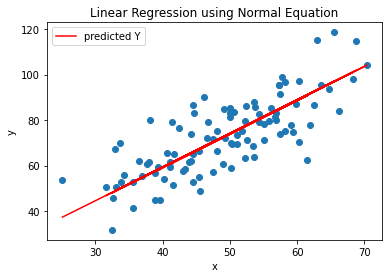

In [4]:
_y = y/n
_x = x/n
B = sum(x*y - _y*x) / sum(x*x - _x*x)
a = _y - B * _x
pred_Y = a + B*x
print(f"Value of b: {B}")
print(f"Value of a: \n{a}")
plt.scatter(x, y) 
plt.plot(x, pred_Y, color="red", label="predicted Y")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using Normal Equation")
plt.legend()
plt.show()

##  Fit linear regression on the data using gradient descent

D_c: -0.600498900286562
m: 1.4788027175308358, c: 0.03507497059234177


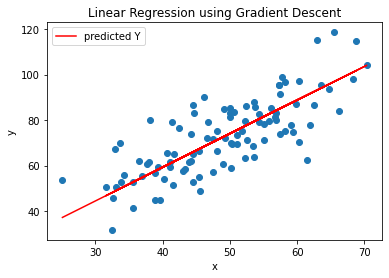

In [5]:
m = 0
c = 0
mu = 0.0001  # learning rate
epochs = 100

for i in range(epochs): 
    Y_pred = m*x + c
    D_m = (-2/n) * sum(x * (y - Y_pred))
    D_c = (-2/n) * sum(y - Y_pred)
    m = m - mu * D_m
    c = c - mu * D_c
    # print(f"m: {m}, c: {c}")
    
print(f"D_c: {D_c}")
print(f"m: {m}, c: {c}")
Y_pred = m*x + c
plt.scatter(x, y) 
plt.plot(x, Y_pred, color="red", label="predicted Y")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()

# Exercise 2

In [6]:
reviews = pd.read_csv("chicago_hotel_reviews.csv", index_col=0)
x_train, x_test, Y_train, Y_test = train_test_split(reviews, reviews.rating, test_size=0.2)

In [7]:
get_reviews = FunctionTransformer(lambda x: x.review, validate=False)
cv = CountVectorizer(stop_words='english', lowercase=True, ngram_range=(1,2))
linReg = LinearRegression()

In [10]:
# linear regression
steps = [("getReviews", get_reviews), ("vect", cv), ("clf", linReg)]
pipeline = Pipeline(steps)
pipeline.fit(x_train, Y_train)
Y_pred = pipeline.predict(x_test)
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")


Mean Squared Error: 1.258383515006988


In [11]:
# using feature selection
feature_selection = SelectPercentile(f_regression, percentile=2)
steps = [("getReviews", get_reviews), ("vect", cv), ("featureSelection", feature_selection), ("clf", linReg)]
pipeline = Pipeline(steps)
pipeline.fit(x_train, Y_train)
Y_pred = pipeline.predict(x_test)
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")


Mean Squared Error: 1.0125938673951946
